<a href="https://colab.research.google.com/github/drwatson93/Data_science/blob/master/Data_Analysis_RMS_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This assignment is a good exercise to practice many of the concepts we covered in the “Pandas”sections.  
* 1-Load “titanic_data.csv”file - DONE
*2-Explore data to understandthem and to find missing data - DONE
*3-Add a new column called “FamilySize”that is equal to (“SibSp”–“Parch”) - DONE
*4-Remove unwanted columns ('Cabin','Name','Ticket', ‘SibSp’, ‘Parch’)
*5-For missing ages replace them with themean ofages for their own gender (Sex) and cabinclass (Pclass)
*6-For missing “Embarked”find your strategy (do someanalysis and decide what value you put there)
*7-Map “Embarked”and “Pclass”to more descriptive values:a.Embarked -> {'S':'Southampton','C':'Cherbourg','Q':'Queenstown'}b.Pclass -> {1:'Upper Class',2:'Middle Class',3:'Lower Class'}
*8-Create a column named “AgeGroup”that groups thepassengers in the following groups: ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79']. Tip: you can use “pandas’cut”function.
*9-Show thenumber of survivorsandnon-survivorsusing “groupby”
*10-Create a crosstab table to show survivors and non-survivorsfor eachgender. Tip:use “pandas’crosstab”function
*11-Show the survivedproportion (mean) by gender (using groupby)
*12-Plot the resultslike below:
*13-Repeat the steps 10-12 for cabin class (Pclass)
*14-Repeat the steps 10-12 for age group (AgeGroup)
*15-Plot a “boxplot”of age versus gender


In [155]:
# Libraries to import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [156]:
# Load “titanic_data.csv”file
# loading data from google drive storage.
titanic_df = pd.read_csv('/content/drive/MyDrive/general/Assignment 3/titanic_data.csv')

# Load "titanic_data.csv" file
# Need to finish - Loading data from slack external link.
#titanic_df = pd.read_csv('https://slack-files.com/TTQ6X9H24-F01M0DZAMEW-1afb6f2ac4')


In [157]:
#1- Explore the first 10 rows
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [158]:
# 2- Explore data to understandthem and to find missing data
titanic_df.info() # missing values in "Age", "Cabin", and "Embarked"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [159]:
# 3- Add a new column called “FamilySize”that is equal to (“SibSp”–“Parch”)
titanic_df["FamilySize"] = titanic_df["SibSp"] - titanic_df["Parch"]
print(titanic_df.head())
print(titanic_df.tail())

   PassengerId  Survived  Pclass  ... Cabin Embarked  FamilySize
0            1         0       3  ...   NaN        S           1
1            2         1       1  ...   C85        C           1
2            3         1       3  ...   NaN        S           0
3            4         1       1  ...  C123        S           1
4            5         0       3  ...   NaN        S           0

[5 rows x 13 columns]
     PassengerId  Survived  Pclass  ... Cabin Embarked  FamilySize
886          887         0       2  ...   NaN        S           0
887          888         1       1  ...   B42        S           0
888          889         0       3  ...   NaN        S          -1
889          890         1       1  ...  C148        C           0
890          891         0       3  ...   NaN        Q           0

[5 rows x 13 columns]


In [160]:
# 4-Remove unwanted columns ('Cabin','Name','Ticket', ‘SibSp’, ‘Parch’)
# code will remove unwanted columns and return a new variable "titanic_df_condense with the minimal columns required"
col_to_drop = ['Cabin','Name','Ticket', 'SibSp', 'Parch']
titanic_df_condense = titanic_df.drop(col_to_drop, axis='columns', inplace=False)
titanic_df_condense.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,male,22.0,7.2500,S,1
1,2,1,1,female,38.0,71.2833,C,1
2,3,1,3,female,26.0,7.9250,S,0
3,4,1,1,female,35.0,53.1000,S,1
4,5,0,3,male,35.0,8.0500,S,0


In [161]:
# 5-For missing ages replace them with the mean of ages for their own gender (Sex) and cabinclass (Pclass)
# mean of all cabin class per sex
titanic_df_mean = titanic_df_condense.groupby(['Sex', 'Pclass'])['Age'].mean().unstack().round(0)
print(titanic_df_mean)

# Replacing null values with their corresponding mean.
titanic_df_condense.loc[titanic_df_condense.Age.isnull() & (titanic_df_condense.Sex == 'female') & (titanic_df_condense.Pclass == 1),'Age'] = titanic_df_mean.iloc[0,0]
titanic_df_condense.loc[titanic_df_condense.Age.isnull() & (titanic_df_condense.Sex == 'female') & (titanic_df_condense.Pclass == 2),'Age'] = titanic_df_mean.iloc[0,1]
titanic_df_condense.loc[titanic_df_condense.Age.isnull() & (titanic_df_condense.Sex == 'female') & (titanic_df_condense.Pclass == 3),'Age'] = titanic_df_mean.iloc[0,2]
titanic_df_condense.loc[titanic_df_condense.Age.isnull() & (titanic_df_condense.Sex == 'male') & (titanic_df_condense.Pclass == 1),'Age'] = titanic_df_mean.iloc[1,0]
titanic_df_condense.loc[titanic_df_condense.Age.isnull() & (titanic_df_condense.Sex == 'male') & (titanic_df_condense.Pclass == 2),'Age'] = titanic_df_mean.iloc[1,1]
titanic_df_condense.loc[titanic_df_condense.Age.isnull() & (titanic_df_condense.Sex == 'male') & (titanic_df_condense.Pclass == 3),'Age'] = titanic_df_mean.iloc[1,2]

# verify no null values
titanic_df_condense.info()

Pclass     1     2     3
Sex                     
female  35.0  29.0  22.0
male    41.0  31.0  27.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     889 non-null    object 
 7   FamilySize   891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    object 
 7   FamilySize   891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


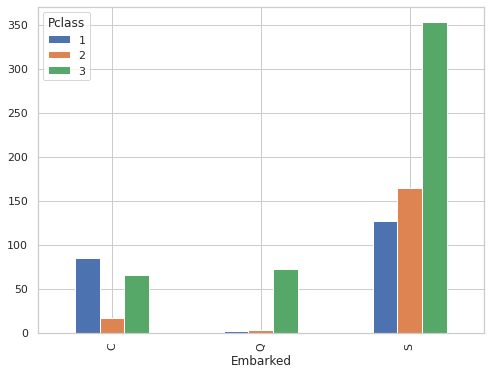

In [162]:
# 6-For missing “Embarked” find your strategy (do some analysis and decide what value you put there)
# Strategy: Graph below shows that 72% of embarkements happend in S=Southampton. therefore we can confidently assume that the missing value would have embarked from Southampton.
titanic_df_condense.groupby(['Embarked', 'Pclass'])['Pclass'].count().unstack().plot.bar(figsize=(8, 6))
# Replacing NAN with S=Southampton.
titanic_df_condense["Embarked"] = titanic_df_condense["Embarked"].fillna(value='S')
# Verify no null values
titanic_df_condense.info()

In [163]:
# 7-Map “Embarked” and “Pclass” to more descriptive values:
# create a dict of replacement labels
desc_val_dict = {
    'Emabarked':{'S':'Southampton','C':'Cherbourg','Q':'Queenstown'},
    'Pclass':{1:'Upper Class',2:'Middle Class',3:'Lower Class'}
                 }

# apply replacement labels using pd.replace function.
titanic_df_condense.replace(to_replace = desc_val_dict, value=None, inplace=True)

#Verify replacement
titanic_df_condense.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1,0,Lower Class,male,22.0,7.2500,S,1
1,2,1,Upper Class,female,38.0,71.2833,C,1
2,3,1,Lower Class,female,26.0,7.9250,S,0
3,4,1,Upper Class,female,35.0,53.1000,S,1
4,5,0,Lower Class,male,35.0,8.0500,S,0


In [164]:
# 8-Create a column named “AgeGroup” that groups the passengers in the following groups: ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79']. Tip: you can use “pandas’cut”function.
# create a list of age group.
age_grp_labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79']
#created a new column AgeGroup using pd.cut function with 8 bins and the labels from age_grp_labels list.
titanic_df_condense['AgeGroup'] = pd.cut(x=titanic_df_condense["Age"], bins=8, labels=age_grp_labels)
#Verify AgeGroup column
titanic_df_condense.head()


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,AgeGroup
0,1,0,Lower Class,male,22.0,7.2500,S,1,20-29
1,2,1,Upper Class,female,38.0,71.2833,C,1,30-39
2,3,1,Lower Class,female,26.0,7.9250,S,0,20-29
3,4,1,Upper Class,female,35.0,53.1000,S,1,30-39
4,5,0,Lower Class,male,35.0,8.0500,S,0,30-39


In [165]:
# 9-Show the number of survivors and non-survivors using “groupby”
titanic_df_condense.groupby(['Sex', 'Survived'] )['Survived'].count().unstack(1)

Survived,0,1
Sex,,
female,81,233
male,468,109


In [166]:
# 10-Create a crosstab table to show survivors and non-survivors for each gender. Tip:use “pandas’crosstab”function
# create an nd.array for values in sex and surviced columns, will make it easier to input data for later use.
arr_sex = titanic_df_condense['Sex'].to_numpy()
arr_survived = titanic_df_condense['Survived'].to_numpy()
# used pd.crosstab to show number of survivers by sex.
pd.crosstab(arr_sex, arr_survived, rownames=['arr_sex'], colnames=['arr_survived'])

arr_survived,0,1
arr_sex,,
female,81,233
male,468,109


In [167]:
# 11-Show the survived proportion (mean) by gender (using groupby)
titanic_df_condense.groupby('Sex')['Survived'].mean().round(4)

Sex
female    0.7420
male      0.1889
Name: Survived, dtype: float64

Text(0, 0.5, 'Percentage')

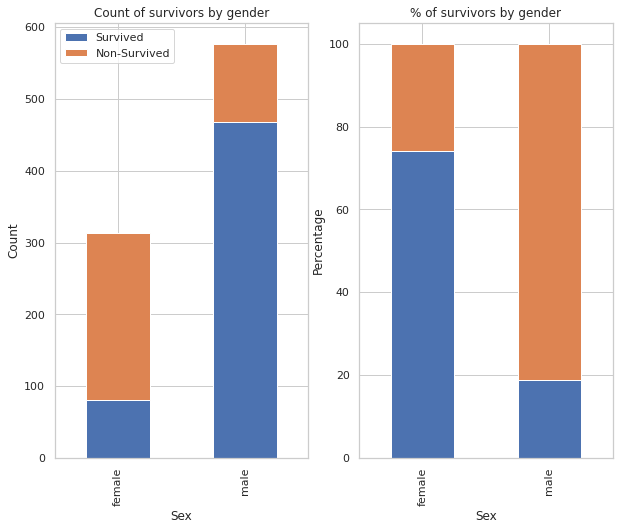

In [168]:
# 12-Plot the results:
# create subplot to hold two graphs.
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 8))
# plot count of survivors by gender
titanic_df_condense.groupby(['Sex', 'Survived'] )['Survived'].count().unstack(1).plot.bar(ax=ax1, stacked=True, )

# need to calculate the percentage of passagers that survived base of sex.
pct_survived = titanic_df_condense.groupby('Sex')['Survived'].mean().round(4) * 100
pct_non_survived = (titanic_df_condense.groupby('Sex')['Survived'].mean().round(4).rename('Non-Survived') * 100 - 100) * -1
pct_df = pd.concat([pct_survived, pct_non_survived], axis=1)

# plot % of survivors by gender.
pct_df.plot.bar(ax=ax2, stacked=True, legend=False)

# titles and axis labels.
ax1.set_title('Count of survivors by gender')
ax1.set_ylabel('Count')
ax1.legend(['Survived', 'Non-Survived'])
ax2.set_title('% of survivors by gender')
ax2.set_ylabel('Percentage')


Text(0, 0.5, 'Percentage')

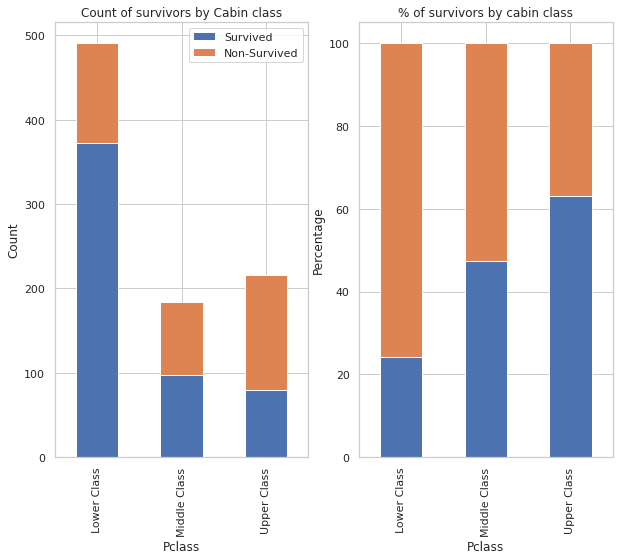

In [169]:
# 13-Repeat the steps 10-12 for cabin class (Pclass)
arr_pclass = titanic_df_condense['Pclass'].to_numpy()
pd.crosstab(arr_pclass, arr_survived, rownames=['arr_pclass'], colnames=['arr_survived'])

# mean of pclass and survived using groupby.
titanic_df_condense.groupby('Pclass')['Survived'].mean().round(4)

# plotted results for Pclass and survived
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 8))
titanic_df_condense.groupby(['Pclass', 'Survived'] )['Survived'].count().unstack(1).plot.bar(ax=ax1, stacked=True, )

pct_survived = titanic_df_condense.groupby('Pclass')['Survived'].mean().round(4) * 100
pct_non_survived = (titanic_df_condense.groupby('Pclass')['Survived'].mean().round(4).rename('Non-Survived') * 100 - 100) * -1
pct_df = pd.concat([pct_survived, pct_non_survived], axis=1)
pct_df.plot.bar(ax=ax2, stacked=True, legend=False)

ax1.set_title('Count of survivors by Cabin class')
ax1.set_ylabel('Count')
ax1.legend(['Survived', 'Non-Survived'])
ax2.set_title('% of survivors by cabin class')
ax2.set_ylabel('Percentage')

Text(0, 0.5, 'Percentage')

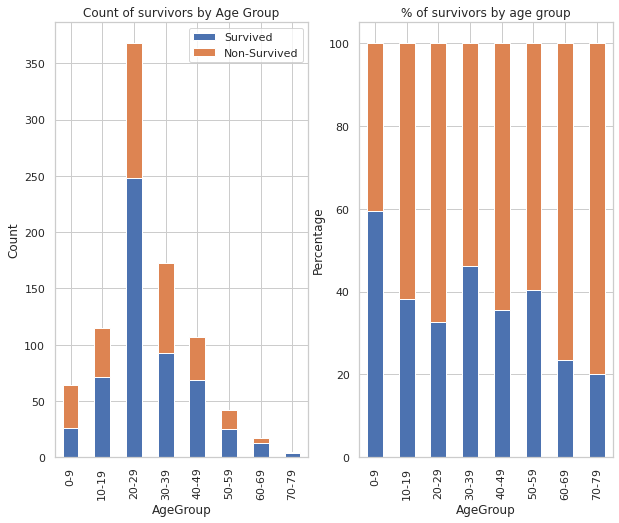

In [170]:
# 14-Repeat the steps 10-12 for age group (AgeGroup)
arr_age_group = titanic_df_condense['AgeGroup'].to_numpy()
pd.crosstab(arr_age_group, arr_survived, rownames=['arr_age_group'], colnames=['arr_survived'])

# mean of pclass and survived using groupby.
titanic_df_condense.groupby('AgeGroup')['Survived'].mean().round(4)

# plotted results for Pclass and survived
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 8))
titanic_df_condense.groupby(['AgeGroup', 'Survived'] )['Survived'].count().unstack(1).plot.bar(ax=ax1, stacked=True, )

pct_survived = titanic_df_condense.groupby('AgeGroup')['Survived'].mean().round(4) * 100
pct_non_survived = (titanic_df_condense.groupby('AgeGroup')['Survived'].mean().round(4).rename('Non-Survived') * 100 - 100) * -1
pct_df = pd.concat([pct_survived, pct_non_survived], axis=1)
pct_df.plot.bar(ax=ax2, stacked=True, legend=False)

ax1.set_title('Count of survivors by Age Group')
ax1.set_ylabel('Count')
ax1.legend(['Survived', 'Non-Survived'])
ax2.set_title('% of survivors by age group')
ax2.set_ylabel('Percentage')

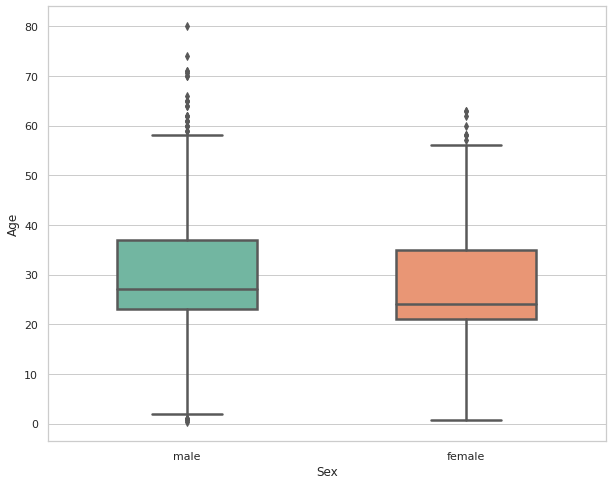

In [171]:
# 15-Plot a “boxplot” of age versus gender
sex_vs_age_df = titanic_df_condense[['Age','Sex']]
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
sns.boxplot(y='Age', x='Sex', data=sex_vs_age_df, palette="Set2", width=.5, fliersize=5, linewidth=2.5 )
